# Test simulation with high dosing

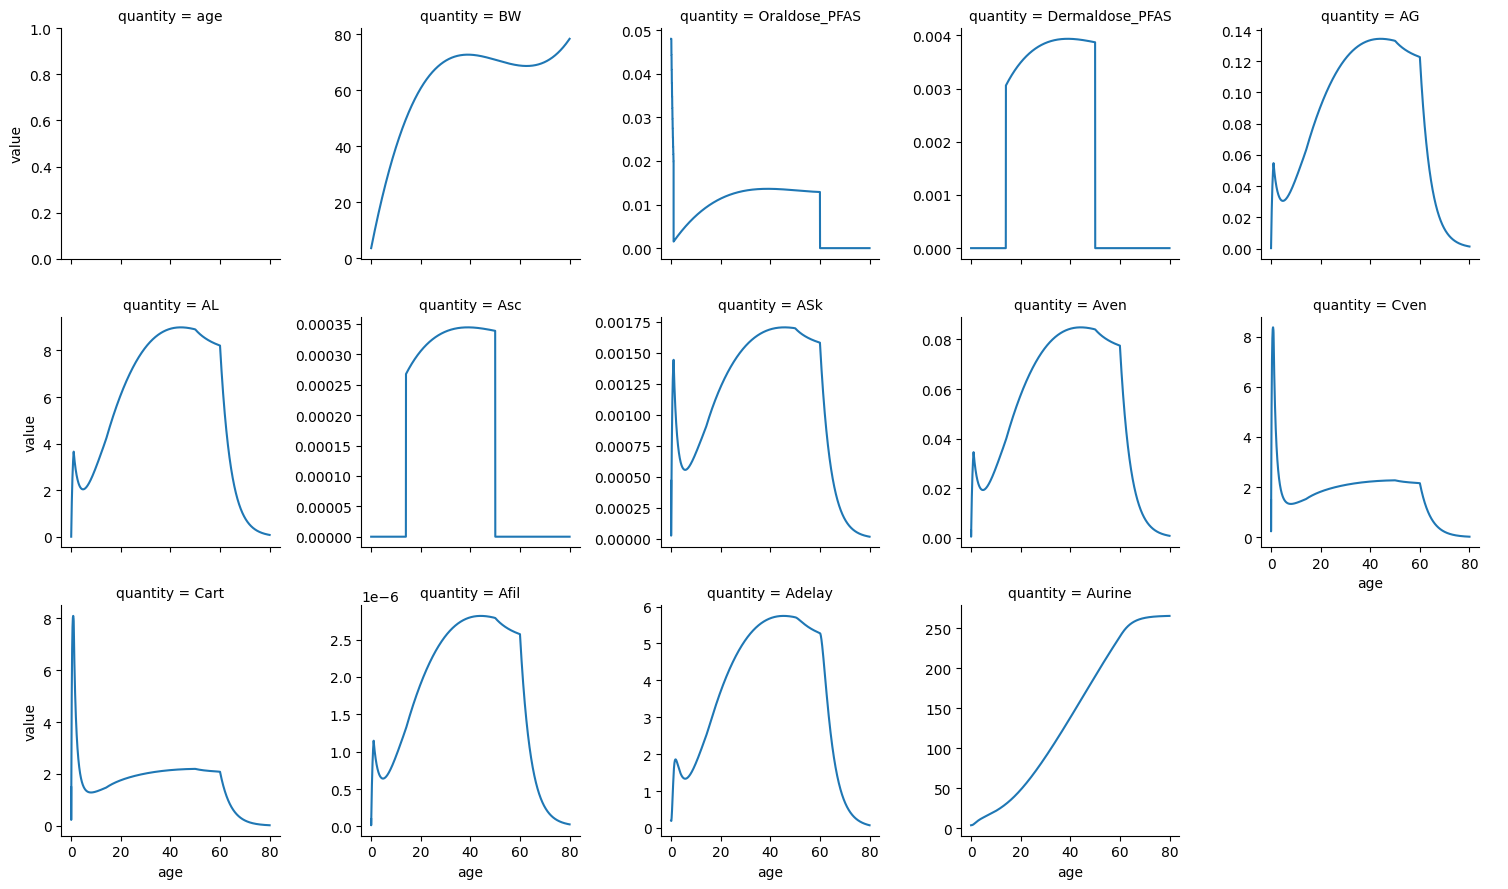

In [1]:
import pandas as pd
import seaborn as sns 
import tellurium as te

fn_ant = '../model/PBK PFAS generic.ant'

def run_generic_PFAS_model(rr_model, plot_params, start=0, end=29200, stepsize=14600):
    sim_result = rr_model.simulate(0, 29200, 14600, plot_params)
    sim_result = pd.DataFrame(sim_result, columns = sim_result.colnames)
    df_sim = pd.melt(sim_result, id_vars=['age'], value_vars=plot_params, var_name='quantity', value_name='value')
    g = sns.FacetGrid(df_sim, col='quantity', col_wrap=5, sharey=False, col_order=plot_params)
    g.map(sns.lineplot, 'age', 'value')
    g.add_legend()

plot_params = ['age', 'BW', 'Oraldose_PFAS', 'Dermaldose_PFAS', 'AG', 'AL','Asc','ASk','Aven','Cven','Cart','Afil','Adelay','Aurine']

generic_PFAS_model = te.loada(fn_ant)
#generic_PFAS_model.Dermconc = 10
run_generic_PFAS_model(generic_PFAS_model, plot_params, start=0, end=29200, stepsize=14600)
